<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">SimpleRNN</div></center></h1>

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
%matplotlib inline

2023-08-30 22:24:58.813157: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 22:24:59.588762: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Dataset generation 

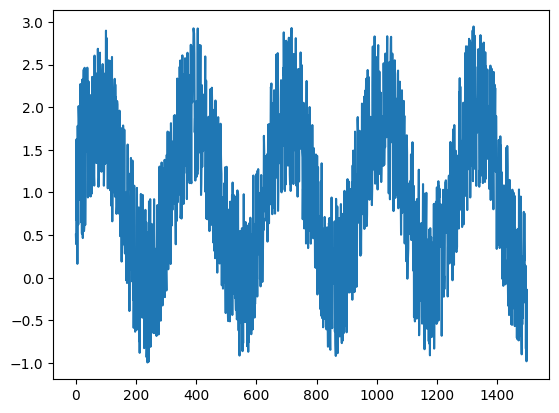

In [2]:
t = np.arange(0,1500)
x = np.sin(0.02*t)+ np.random.rand(1500) * 2
plt.plot(x)
plt.show()

train test split

In [3]:
train,test = x[0:1000], x[1000:]

In [4]:
step = 10   # time step

# convert into dataset data and label
def convertToDataset(data, step):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

trainX ,trainY =convertToDataset(train,step)
testX,testY =convertToDataset(test,step)

In [5]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)

(990, 10)
(990,)
(490, 10)


In [6]:
print(trainY[0:10])

[1.86812874 0.91507427 0.96687966 1.57882217 1.96604296 2.27119073
 1.68302097 1.69155669 0.64990797 1.55385643]


input shape in keras :


    (NumberOfSequences, TimeSteps, ElementsPerStep)

In [7]:
trainX = np.reshape(trainX, (trainX.shape[0],  trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))


In [8]:
print(trainX.shape)
print(testX.shape)

(990, 10, 1)
(490, 10, 1)


Network architecture :

In [9]:
model = Sequential()
model.add(SimpleRNN(units=64, activation="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')

2023-08-30 22:25:02.587460: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-30 22:25:02.618827: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-30 22:25:02.619363: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-30 22:25:02.624931: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-30 22:25:02.625603: I tensorflow/compile

fit model :

In [10]:
history = model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=1)

Epoch 1/100


2023-08-30 22:25:05.400632: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f21a40357d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-30 22:25:05.400668: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2023-08-30 22:25:05.405301: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-30 22:25:05.556172: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-30 22:25:05.681100: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-30 22:25:05.796921: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


62/62 [==============================] - 3s 13ms/step - loss: 0.4872
Epoch 2/100
62/62 [==============================] - 1s 13ms/step - loss: 0.4154
Epoch 3/100
62/62 [==============================] - 1s 14ms/step - loss: 0.4047
Epoch 4/100
62/62 [==============================] - 1s 13ms/step - loss: 0.3944
Epoch 5/100
62/62 [==============================] - 1s 13ms/step - loss: 0.3963
Epoch 6/100
62/62 [==============================] - 1s 13ms/step - loss: 0.3802
Epoch 7/100
62/62 [==============================] - 1s 14ms/step - loss: 0.3846
Epoch 8/100
62/62 [==============================] - 1s 13ms/step - loss: 0.3843
Epoch 9/100
62/62 [==============================] - 1s 13ms/step - loss: 0.3751
Epoch 10/100
62/62 [==============================] - 1s 13ms/step - loss: 0.3823
Epoch 11/100
62/62 [==============================] - 1s 13ms/step - loss: 0.3693
Epoch 12/100
62/62 [==============================] - 1s 14ms/step - loss: 0.3718
Epoch 13/100
62/62 [=================

KeyboardInterrupt: 

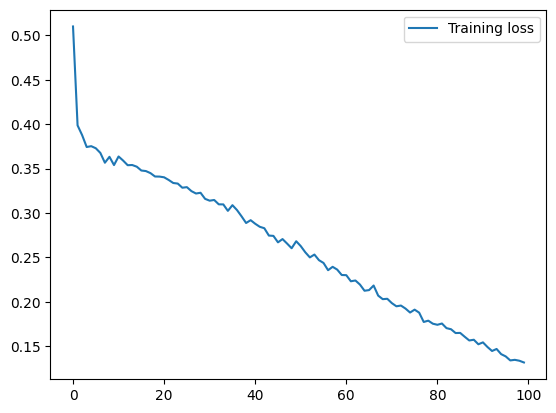

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
plt.plot(loss, label='Training loss')
plt.legend()

plt.show()

Model evaluation :

In [ ]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

0.11744379252195358


prediction for test data :

In [ ]:
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

16/16 [==============================] - 0s 4ms/step


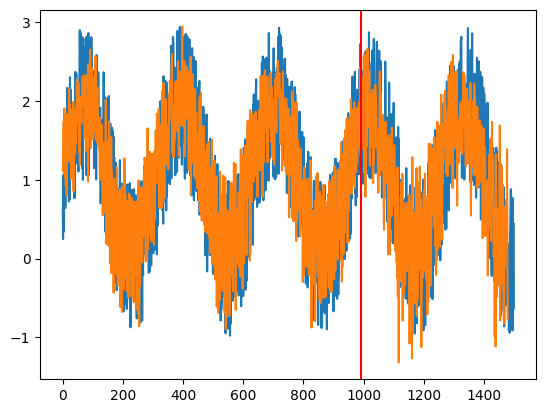

In [ ]:
plt.plot(x)
plt.plot(predicted)
plt.axvline(len(trainX), c="r")
plt.show()